# Импорт библиотек

In [25]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import datatable as dt
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
import joblib
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,fbeta_score, precision_score,recall_score,accuracy_score, roc_auc_score

In [2]:
df = pd.read_csv('sup_data/summary_df.csv')
df.head()

,rn,pre_since_opened_0,pre_since_opened_1,pre_since_opened_2,pre_since_opened_3,pre_since_opened_4,pre_since_opened_5,pre_since_opened_6,pre_since_opened_7,pre_since_opened_8,pre_since_opened_9,pre_since_opened_10,pre_since_opened_11,pre_since_opened_12,pre_since_opened_13,pre_since_opened_14,pre_since_opened_15,pre_since_opened_16,pre_since_opened_17,pre_since_opened_18,pre_since_opened_19,pre_since_confirmed_0,pre_since_confirmed_1,pre_since_confirmed_2,pre_since_confirmed_3,pre_since_confirmed_4,pre_since_confirmed_5,pre_since_confirmed_6,pre_since_confirmed_7,pre_since_confirmed_8,pre_since_confirmed_9,pre_since_confirmed_10,pre_since_confirmed_11,pre_since_confirmed_12,pre_since_confirmed_13,pre_since_confirmed_14,pre_since_confirmed_15,pre_since_confirmed_16,pre_since_confirmed_17,pre_pterm_0,pre_pterm_1,pre_pterm_2,pre_pterm_3,pre_pterm_4,pre_pterm_5,pre_pterm_6,pre_pterm_7,pre_pterm_8,pre_pterm_9,pre_pterm_10,pre_pterm_11,pre_pterm_12,pre_pterm_13,pre_pterm_14,pre_pterm_15,pre_pterm_16,pre_pterm_17,pre_fterm_0,pre_fterm_1,pre_fterm_2,pre_fterm_3,pre_fterm_4,pre_fterm_5,pre_fterm_6,pre_fterm_7,pre_fterm_8,pre_fterm_9,pre_fterm_10,pre_fterm_11,pre_fterm_12,pre_fterm_13,pre_fterm_14,pre_fterm_15,pre_fterm_16,pre_till_pclose_0,pre_till_pclose_1,pre_till_pclose_2,pre_till_pclose_3,pre_till_pclose_4,pre_till_pclose_5,pre_till_pclose_6,pre_till_pclose_7,pre_till_pclose_8,pre_till_pclose_9,pre_till_pclose_10,pre_till_pclose_11,pre_till_pclose_12,pre_till_pclose_13,pre_till_pclose_14,pre_till_pclose_15,pre_till_pclose_16,pre_till_fclose_0,pre_till_fclose_1,pre_till_fclose_2,pre_till_fclose_3,pre_till_fclose_4,pre_till_fclose_5,pre_till_fclose_6,pre_till_fclose_7,pre_till_fclose_8,pre_till_fclose_9,pre_till_fclose_10,pre_till_fclose_11,pre_till_fclose_12,pre_till_fclose_13,pre_till_fclose_14,pre_till_fclose_15,pre_loans_credit_limit_0,pre_loans_credit_limit_1,pre_loans_credit_limit_2,pre_loans_credit_limit_3,pre_loans_credit_limit_4,pre_loans_credit_limit_5,pre_loans_credit_limit_6,pre_loans_credit_limit_7,pre_loans_credit_limit_8,pre_loans_credit_limit_9,pre_loans_credit_limit_10,pre_loans_credit_limit_11,pre_loans_credit_limit_12,pre_loans_credit_limit_13,pre_loans_credit_limit_14,pre_loans_credit_limit_15,pre_loans_credit_limit_16,pre_loans_credit_limit_17,pre_loans_credit_limit_18,pre_loans_credit_limit_19,pre_loans_next_pay_summ_0,pre_loans_next_pay_summ_1,pre_loans_next_pay_summ_2,pre_loans_next_pay_summ_3,pre_loans_next_pay_summ_4,pre_loans_next_pay_summ_5,pre_loans_next_pay_summ_6,pre_loans_outstanding_1,pre_loans_outstanding_2,pre_loans_outstanding_3,pre_loans_outstanding_4,pre_loans_outstanding_5,pre_loans_total_overdue_0,pre_loans_total_overdue_1,pre_loans_max_overdue_sum_0,pre_loans_max_overdue_sum_1,pre_loans_max_overdue_sum_2,pre_loans_max_overdue_sum_3,pre_loans_credit_cost_rate_0,pre_loans_credit_cost_rate_1,pre_loans_credit_cost_rate_2,pre_loans_credit_cost_rate_3,pre_loans_credit_cost_rate_4,pre_loans_credit_cost_rate_5,pre_loans_credit_cost_rate_6,pre_loans_credit_cost_rate_7,pre_loans_credit_cost_rate_8,pre_loans_credit_cost_rate_9,pre_loans_credit_cost_rate_10,pre_loans_credit_cost_rate_11,pre_loans_credit_cost_rate_12,pre_loans_credit_cost_rate_13,pre_loans5_0,pre_loans5_1,pre_loans5_2,pre_loans5_3,pre_loans5_5,pre_loans5_6,pre_loans5_7,pre_loans5_8,pre_loans5_9,pre_loans5_10,pre_loans5_11,pre_loans5_13,pre_loans5_16,pre_loans530_0,pre_loans530_1,pre_loans530_2,pre_loans530_3,pre_loans530_4,pre_loans530_5,pre_loans530_6,pre_loans530_7,pre_loans530_8,pre_loans530_9,pre_loans530_10,pre_loans530_11,pre_loans530_12,pre_loans530_13,pre_loans530_14,pre_loans530_15,pre_loans530_16,pre_loans530_17,pre_loans530_18,pre_loans530_19,pre_loans3060_0,pre_loans3060_1,pre_loans3060_2,pre_loans3060_3,pre_loans3060_4,pre_loans3060_5,pre_loans3060_6,pre_loans3060_7,pre_loans3060_8,pre_loans3060_9,pre_loans6090_0,pre_loans6090_1,pre_loans6090_2,pre_loans6090_3,pre_loans6090_4,pre_loans90_2,pre_loans90_3,pre_loans90_8,pre_loans

## Приводим датасет к типу данных "int8" для уменьшения занимаемой памяти

In [3]:
df = df.astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Columns: 421 entries, rn to flag
dtypes: int8(421)
memory usage: 1.2 GB


# Перейдем к обучению модели.

Для начала создадим матрицу объект-признак, Х. -> (Все признаки). 

у - вектор целевой перееменной.(наличие дефолта)

In [4]:
X = df.drop(columns=['flag'])
y = df['flag']

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Columns: 420 entries, rn to fclose_flag_1
dtypes: int8(420)
memory usage: 1.2 GB


## Разделим датасет на тренировочную и тестовую выборки:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=313)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2400000 entries, 1662644 to 2149896
Columns: 420 entries, rn to fclose_flag_1
dtypes: int8(420)
memory usage: 979.6 MB


In [8]:
X_train.shape

(2400000, 420)

## Моделирование 

# Обучаем лучшую модель на всей выборке и построим потом ROC-кривую

In [22]:
%%time
catboost = CatBoostClassifier(random_state=313)
catboost.fit(X, y)

# Получение вероятностей для класса 1
pred_proba = catboost.predict_proba(X)[:, 1]



Learning rate set to 0.314532
0:	learn: 0.3389969	total: 460ms	remaining: 7m 39s
1:	learn: 0.2211276	total: 834ms	remaining: 6m 56s
2:	learn: 0.1758708	total: 1.22s	remaining: 6m 44s
3:	learn: 0.1578086	total: 1.69s	remaining: 6m 59s
4:	learn: 0.1504292	total: 2.16s	remaining: 7m 10s
5:	learn: 0.1467106	total: 2.64s	remaining: 7m 16s
6:	learn: 0.1444595	total: 3.17s	remaining: 7m 30s
7:	learn: 0.1434010	total: 3.62s	remaining: 7m 28s
8:	learn: 0.1426575	total: 4.1s	remaining: 7m 31s
9:	learn: 0.1422263	total: 4.57s	remaining: 7m 32s
10:	learn: 0.1417880	total: 5.12s	remaining: 7m 40s
11:	learn: 0.1415648	total: 5.53s	remaining: 7m 35s
12:	learn: 0.1412715	total: 6.03s	remaining: 7m 37s
13:	learn: 0.1410635	total: 6.53s	remaining: 7m 40s
14:	learn: 0.1408953	total: 6.96s	remaining: 7m 37s
15:	learn: 0.1407693	total: 7.41s	remaining: 7m 35s
16:	learn: 0.1406004	total: 7.88s	remaining: 7m 35s
17:	learn: 0.1404638	total: 8.35s	remaining: 7m 35s
18:	learn: 0.1403389	total: 8.86s	remaining: 

NameError: name 'y_test' is not defined

In [24]:
roc_auc = roc_auc_score(y, pred_proba)
print("ROC AUC for CatBoostClassifier:", roc_auc)

ROC AUC for CatBoostClassifier: 0.7883597303264659


In [25]:
pred_proba

array([0.00684056, 0.0147726 , 0.10912454, ..., 0.02630429, 0.17453572,
       0.0480809 ])

# Создание пайплайна модели

In [29]:
%%time
# Определение модели
model = CatBoostClassifier(random_state=42)

# Создание пайплайна
pipeline = Pipeline(steps=[
    ('classifier', model)
])

# Обучение модели
pipeline.fit(X, y)

# Предсказание на тестовом наборе
y_pred = pipeline.predict_proba(X)[:,1]
predict = pipeline.predict(X)
# Оценка модели
roc_auc = roc_auc_score(y, y_pred)
print("ROC AUC for Pipeline:", roc_auc)

Learning rate set to 0.314532
0:	learn: 0.3387911	total: 648ms	remaining: 10m 47s
1:	learn: 0.2201723	total: 1.36s	remaining: 11m 20s
2:	learn: 0.1755762	total: 2.28s	remaining: 12m 39s
3:	learn: 0.1572573	total: 3.29s	remaining: 13m 38s
4:	learn: 0.1498211	total: 4.3s	remaining: 14m 16s
5:	learn: 0.1466200	total: 5.07s	remaining: 14m
6:	learn: 0.1444272	total: 6.18s	remaining: 14m 36s
7:	learn: 0.1433896	total: 7.05s	remaining: 14m 34s
8:	learn: 0.1426453	total: 8.02s	remaining: 14m 43s
9:	learn: 0.1421114	total: 9.07s	remaining: 14m 57s
10:	learn: 0.1417320	total: 10s	remaining: 15m 2s
11:	learn: 0.1413975	total: 11s	remaining: 15m 4s
12:	learn: 0.1411954	total: 11.8s	remaining: 14m 54s
13:	learn: 0.1409430	total: 12.8s	remaining: 15m 3s
14:	learn: 0.1407540	total: 13.6s	remaining: 14m 54s
15:	learn: 0.1406180	total: 14.5s	remaining: 14m 50s
16:	learn: 0.1405030	total: 15.3s	remaining: 14m 41s
17:	learn: 0.1403206	total: 16.1s	remaining: 14m 38s
18:	learn: 0.1402155	total: 17s	remain

# Создание файла "predictions.csv" - файл с предиктами на тестовой выборке

In [17]:
predict = pipeline.predict(X)
predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
# Создаем DataFrame из numpy.ndarray
df_predict = pd.DataFrame({
    'Predicted_Label': predict
})

# Сохраняем DataFrame в файл CSV
df_predict.to_csv('predictions.csv', index=False)

# Сохраним наш финальный пайплан

In [26]:
joblib.dump(pipeline, 'final_pipe.pkl')

['final_pipe.pkl']

# Построим ROC-кривую и кривую важности признаков

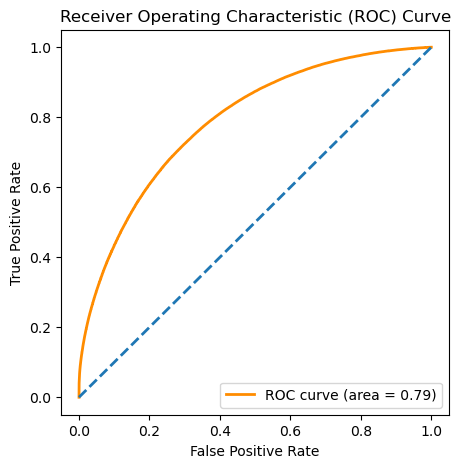

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Рассчитываем значения ROC-кривой
fpr, tpr, thresholds = roc_curve(y, pred_proba)

# Вычисляем площадь под кривой (AUC)
roc_auc = auc(fpr, tpr)

# Строим ROC-кривую
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


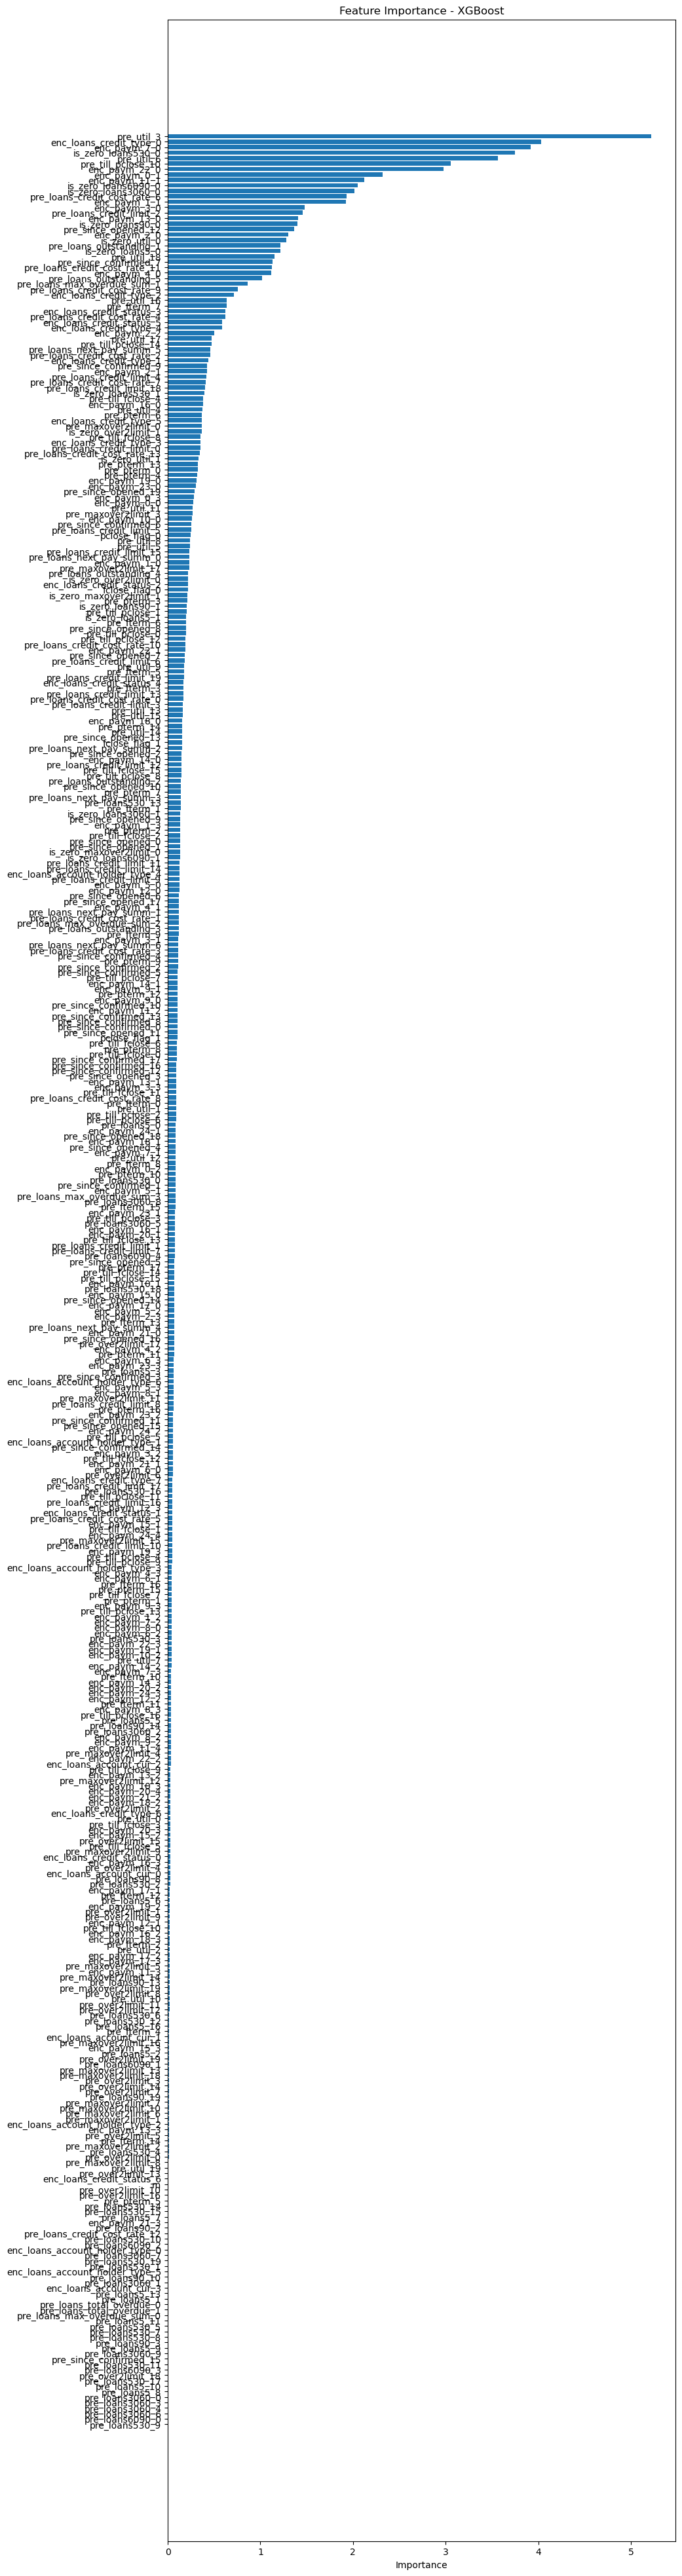

In [40]:
# Строим график с важностью фичей

# Получение важности фичей
feature_importance = catboost.feature_importances_

# Создание DataFrame с важностью фичей и их именами
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Сортировка по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance')

# Построение графика
plt.figure(figsize=(10, 50))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - XGBoost')
plt.show()